<a href="https://colab.research.google.com/github/jyotidabass/Tongue-image-segment/blob/main/Tongue_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 8  5  7 -1]
  [-1 -1 -1  6]
  [10  6  9 -1]
  [-1 -1 -1  8]
  [11  8 -1 -1]
  [13 10 12 -1]
  [-1 -1 -1 11]
  [14 11 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [25 22 24 -1]
  [-1 -1 -1 23]
  [26 23 -1 -1]
  [27 25 -1 -1]
  [28 26 -1 -1]
  [29 27 -1 -1]
  [30 28 -1 -1]
  [31 29 -1 -1]
  [32 30 -1 -1]
  [34 31 33 -1]
  [-1 -1 -1 32]
  [36 32 35 -1]
  [-1 -1 -1 34]
  [38 34 37 -1]
  [-1 -1 -1 36]
  [-1 36 39 -1]
  [-1 -1 -1 38]]]


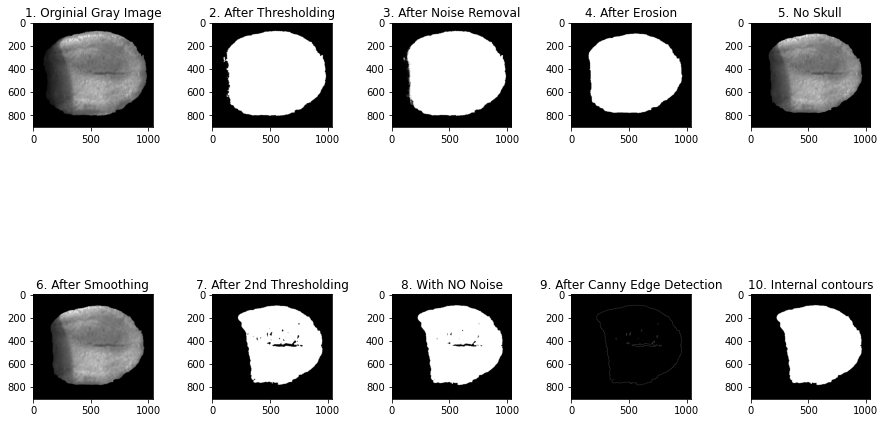

In [6]:

import cv2
import numpy as np 
import matplotlib.pyplot as plt

#creating a filter of ones like a small blur

kernel = np.ones((7,7),np.uint8)

######################
### Defining a segmentation class #####
######################

class segmentation(object):

    def read_image(self,image):
        image_read = cv2.imread('/content/cropped-1E6AE7E2-F4F6-4EFC-AFEC-75B6AF988C47 - Abhishek Karekar.jpg')
        image_gray = cv2.cvtColor(image_read,cv2.COLOR_BGR2GRAY)

        return image_gray

    #Binarization
    def binary(self,image_gray):
        ret,th1 = cv2.threshold(image_gray,30,255,cv2.THRESH_BINARY)
        #noise removal
        image_closing = cv2.morphologyEx(th1,cv2.MORPH_CLOSE,kernel)

        return image_closing,th1
    #remove skull 
    def skull_removal(self,image_closing,image):
        erosion = cv2.erode(image_closing,kernel,iterations=7)
        without_skull = image*(-erosion)

        return erosion, without_skull
    
    def enhance(self,without_skull):
        #median = cv2.medianBlur(without_skull,5)
        #blur = cv2.GaussianBlur(median,(5,5),0)

        blur = cv2.bilateralFilter(without_skull,9,75,75)

        return blur
    
    def segmentation_back(self,blur):
        kernel1 = np.ones((5,5),np.uint8)
        ret, th2 = cv2.threshold(blur,100,65,cv2.THRESH_BINARY)
        #remove noise
        no_noise = cv2.morphologyEx(th2,cv2.MORPH_DILATE,kernel1)

        return th2, no_noise
    
    def edge_detection(self,th2):
        edges = cv2.Canny(th2,150,200)

        return edges
    
    def contour_map(self,edges,image):
        contours,hierarchy=cv2.findContours(edges,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
        internal_contours = np.zeros(image.shape)

        for i in range(len(contours)):
            if hierarchy[0][i][3] != -1: 
                cv2.drawContours(internal_contours,contours,i,255,-1)

        return contours,internal_contours,hierarchy

#declaring the functions in the class
_inst = segmentation()

read_image = _inst.read_image
binarization = _inst.binary
skull_removal = _inst.skull_removal
enhance = _inst.enhance
seg_back = _inst.segmentation_back
edge_detect = _inst.edge_detection
contour_map = _inst.contour_map

#linking the functions with the variables
image_path = 'image_tumor.jpg'
tumor = read_image(image_path)
binarization_results = binarization(tumor)
skull_removal = skull_removal(binarization_results[0],tumor) #image closing and image
enhance = enhance(skull_removal[1]) #without skull image
seg_back = seg_back(enhance) #blur image
edge_detect = edge_detect(seg_back[1]) #threshold back
contour_map = contour_map(edge_detect,tumor)

#####################################
## Plotting all stages of image processing ##
#####################################
fig, axs = plt.subplots(2,5, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.5)

axs = axs.ravel()

axs[0].imshow(tumor,'gray')
axs[0].set_title('1. Orginial Gray Image')
axs[1].imshow(binarization_results[0],'gray')
axs[1].set_title('2. After Thresholding')
axs[2].imshow(binarization_results[1],'gray')
axs[2].set_title('3. After Noise Removal')
axs[3].imshow(skull_removal[0],'gray')
axs[3].set_title('4. After Erosion')
axs[4].imshow(skull_removal[1],'gray')
axs[4].set_title('5. No Skull')
axs[5].imshow(enhance,'gray')
axs[5].set_title('6. After Smoothing')
axs[6].imshow(seg_back[0],'gray')
axs[6].set_title('7. After 2nd Thresholding')
axs[7].imshow(seg_back[1],'gray')
axs[7].set_title('8. With NO Noise')
axs[8].imshow(edge_detect,'gray')
axs[8].set_title('9. After Canny Edge Detection')
axs[9].imshow(contour_map[1],'gray')
axs[9].set_title('10. Internal contours')

#plotting final image with internal contour mapping
print(contour_map[2])
cv2.drawContours(tumor,contour_map[0],-1,(0,255,0),3)
cv2.waitKey(0)

plt.show()